# Lower Back Pain Symptoms Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm 

C:\ProgramData\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('Dataset_spine.csv')

In [3]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Last column should be description of data columns, can be deleted 

In [4]:
del data['Unnamed: 13']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Col1         310 non-null float64
Col2         310 non-null float64
Col3         310 non-null float64
Col4         310 non-null float64
Col5         310 non-null float64
Col6         310 non-null float64
Col7         310 non-null float64
Col8         310 non-null float64
Col9         310 non-null float64
Col10        310 non-null float64
Col11        310 non-null float64
Col12        310 non-null float64
Class_att    310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


Apart from class column, all variables are in numeric

In [6]:
data.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [7]:
data.isnull().any()

Col1         False
Col2         False
Col3         False
Col4         False
Col5         False
Col6         False
Col7         False
Col8         False
Col9         False
Col10        False
Col11        False
Col12        False
Class_att    False
dtype: bool

There is no missing values 

In [8]:
data.shape

(310, 13)

There are 310 records and 13 variables 

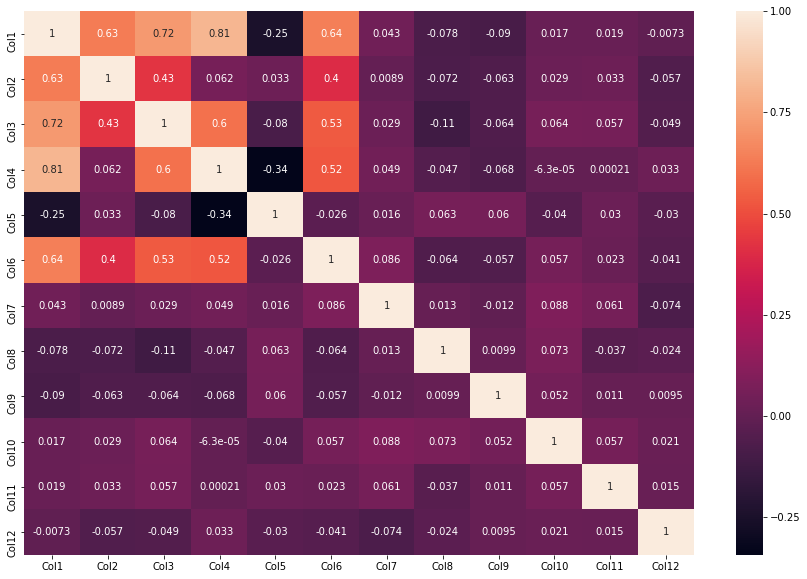

In [9]:
correlation = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)
plt.show()

In [10]:
data[data['Class_att']=='Abnormal'].shape[0]

210

In [11]:
data[data['Class_att']=='Normal'].shape[0]

100

There are 210 abnormal records and 100 normal records. Not too balanced 

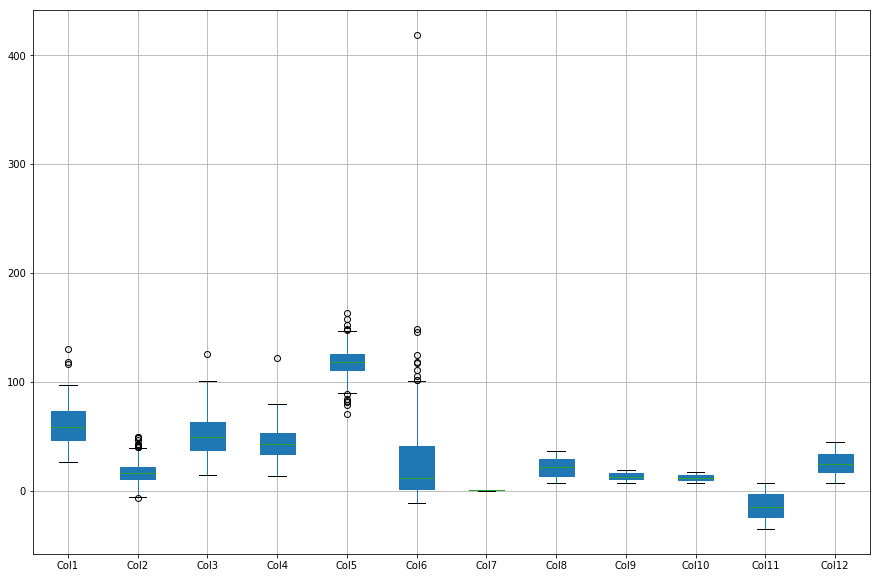

In [12]:
plt.figure(figsize=(15,10))
data.boxplot(patch_artist=True)
plt.show()

Seems there is an outliner in Col6. To prevent distortion, this record will be removed

In [13]:
data.drop(data[data['Col6']>400].index,inplace=True)

In [14]:
data.reset_index(inplace=True)
data.shape

(309, 14)

Only 309 records remain 

Next is to change class label to 1 and 0 for Abnormal and Normal respectively 

In [15]:
data['Class_att']=data['Class_att'].apply(lambda x : '1' if x=='Abnormal' else '0')

## Modelling 

### 1. Preparation 

Scalling, separating feature set and label set, separating training set and test set 

In [16]:
data_feature = data[data.columns.difference(['Class_att'])]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_feature)
data_scaled= pd.DataFrame(data=scaled_data,columns=data_feature.columns)
data_scaled['Class_att']=data['Class_att']
data_scaled.describe()

,Col1,Col10,Col11,Col12,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,index
count,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,309.000000,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02
mean,2.759389e-16,7.760782e-16,8.623091e-17,1.322207e-16,6.898473e-17,1.149746e-16,-3.679186e-16,8.278168e-16,0.000000,3.262403e-16,-8.623091e-17,1.494669e-16,-9.197964e-17
std,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00
min,-2.033920e+00,-1.695268e+00,-1.749936e+00,-1.782967e+00,-2.413996e+00,-2.045086e+00,-2.317633e+00,-3.598089e+00,-1.195467,-1.644263e+00,-1.655859e+00,-1.775446e+00,-1.725656e+00
25%,-8.252598e-01,-8.293587e-01,-8.452152e-01,-8.109590e-01,-6.887296e-01,-8.053920e-01,-7.394791e-01,-5.444615e-01,-0.776291,-8.709970e-01,-9.629807e-01,-7.812625e-01,-8.663313e-01
50%,-9.970018e-02,6.503591e-03,-4.618452e-02,-6.814669e-02,-1.155537e-01,-1.167939e-01,-2.577900e-02,2.927998e-02,-0.449361,1.110127e-02,6.680322e-02,-3.340311e-02,4.153420e-03
75%,7.373866e-01,8.437761e-01,8.621391e-01,8.001104e-01,4.611811e-01,5.960014e-01,7.782263e-01,5.656994e-01,0.525211,8.088970e-01,8.844553e-01,8.438573e-01,8.634781e-01
max,3.449381e+00,1.688829e+00,1.722048e+00,1.789592e+00,3.187612e+00,3.977800e+00,2.923046e+00,3.391100e+00,4.098903,1.849907e+00,1.784383e+00,1.840307e+00,1.722803e+00


In [17]:
X=data_scaled[data_scaled.columns.difference(['Class_att'])]
y=data_scaled['Class_att']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

### 2.1 K Nearest Neighbors 

In [18]:
neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train,y_train)
neighbor.score(X_test,y_test)

0.9838709677419355

98% of accuracy. Not bad 
<br> However, due to unbalanced data, better look at confusion matrix

In [19]:
y_predict = neighbor.predict(X_test)

In [20]:
confusion_matrix(y_test,y_predict)

array([[18,  0],
       [ 1, 43]], dtype=int64)

So good that only one mismatched label

### 2.2 Support Vector Machine 

In [21]:
Svm=svm.SVC()
Svm.fit(X_train,y_train)
Svm.score(X_test,y_test)

0.9838709677419355

In [22]:
y_predict = Svm.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[18,  0],
       [ 1, 43]], dtype=int64)

Same result as K Nearest Neighbors 

### 2.3 Logistic Regression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

0.9838709677419355

In [24]:
y_predict = logreg.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[18,  0],
       [ 1, 43]], dtype=int64)

Apparently all three models can also predict the same results